In [125]:
# Dependencies

import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

from pprint import pprint

import numpy as np
import seaborn as sns
import csv

In [97]:
data = pd.read_csv("data.csv")

data.head()
    

,street,city,zip,state,beds,baths,sq_ft,type,price,latitude,longitude,day,month,date,year
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,59222,38.631913,-121.434879,Wed,May,21,2008
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,68212,38.478902,-121.431028,Wed,May,21,2008
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,68880,38.618305,-121.443839,Wed,May,21,2008
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,69307,38.616835,-121.439146,Wed,May,21,2008
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,81900,38.519470,-121.435768,Wed,May,21,2008


In [98]:
#cleaning data
#removing houses with 0 rooms
cleanData = data[data.beds != 0]
cleanData = cleanData[cleanData.sq_ft != 0]



In [99]:
#price per sq_ft calculation and addition of df
cleanData["price/sq_ft"] = cleanData["price"]/cleanData["sq_ft"]


r = 0.7286419598039956


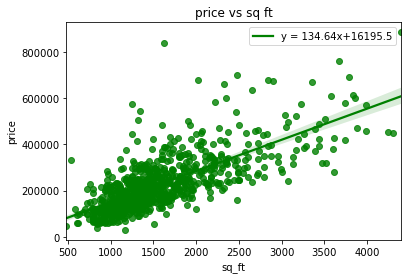

In [100]:
#running early plot on sq_ft by price
slope, intercept, r_value, p_value, std_err = stats.linregress(cleanData['sq_ft'],cleanData['price'])

ax1 = sns.regplot(x="sq_ft", y = "price", data=cleanData, color="g", \
                  line_kws={'label':"y = {0:.2f}x+{1:.1f}".format(slope,intercept)})
ax1.legend()
ax1.set(title="price vs sq ft")
plt.show


print(f"r = {r_value}")
#investigate why not a strong correlation of > .7

In [101]:
#removing occurance zip codes less than 20
cleanDataBox = cleanData.groupby("zip")
cleanDataBox = cleanDataBox.filter(lambda x: len(x) > 12)

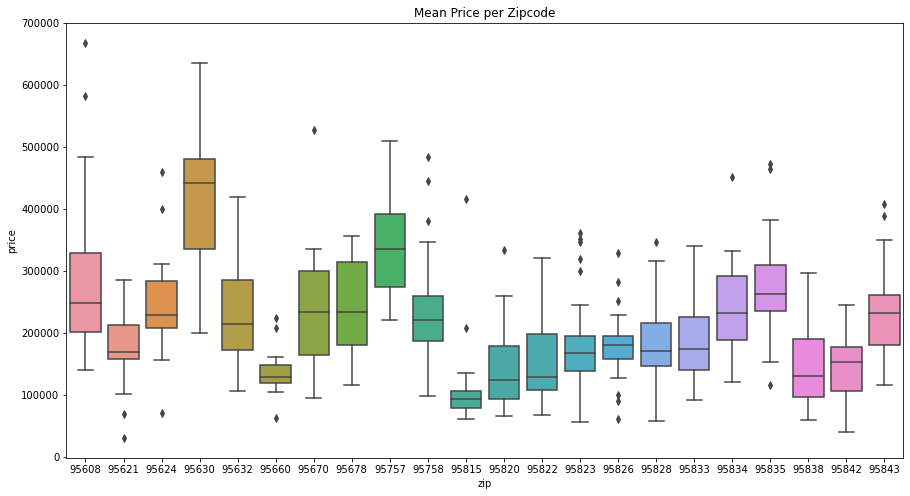

In [102]:
#box plot, price per zip code

ax2 = plt.subplots(figsize = (15,8))
ax2 = sns.boxplot(x="zip", y ="price", data = cleanDataBox).set_title("Mean Price per Zipcode")



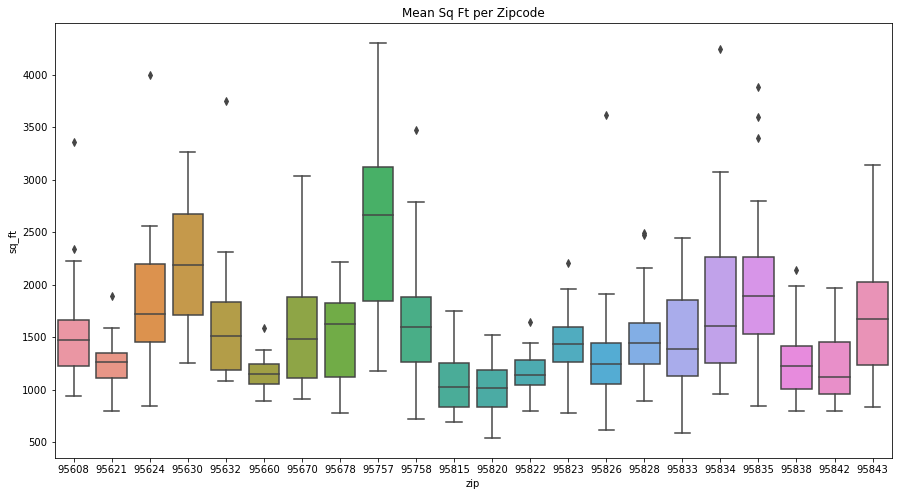

In [103]:
#box plot, zip code and sq feet

ax3 = plt.subplots(figsize = (15,8))
ax3 = sns.boxplot(x="zip", y ="sq_ft", data = cleanDataBox).set_title("Mean Sq Ft per Zipcode")

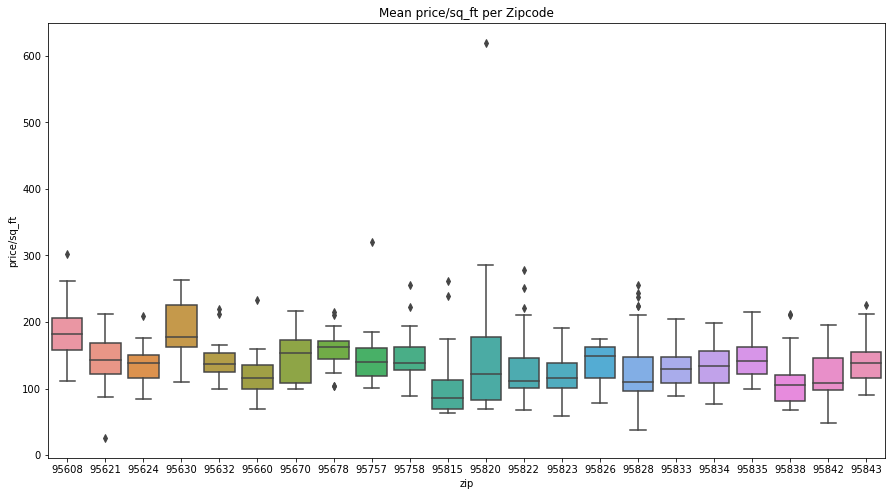

In [105]:
#box plot, zip code and price/sq feet

ax4 = plt.subplots(figsize = (15,8))
ax4 = sns.boxplot(x="zip", y ="price/sq_ft", data = cleanDataBox).set_title("Mean price/sq_ft per Zipcode")

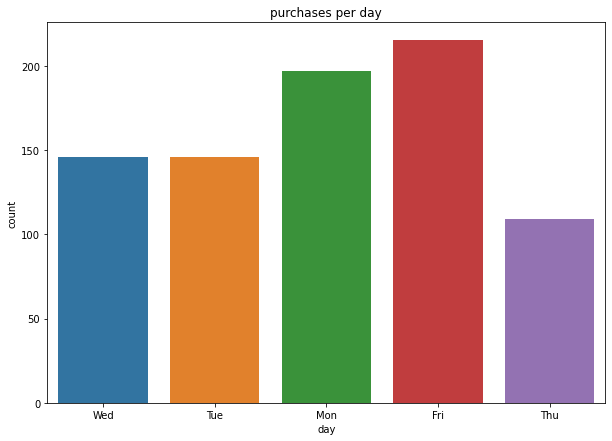

In [146]:
# purchases per day
countplt,ax5 = plt.subplots(figsize = (10,7))
ax5 = sns.countplot(x = "day", data = cleanData).set_title("purchases per day")

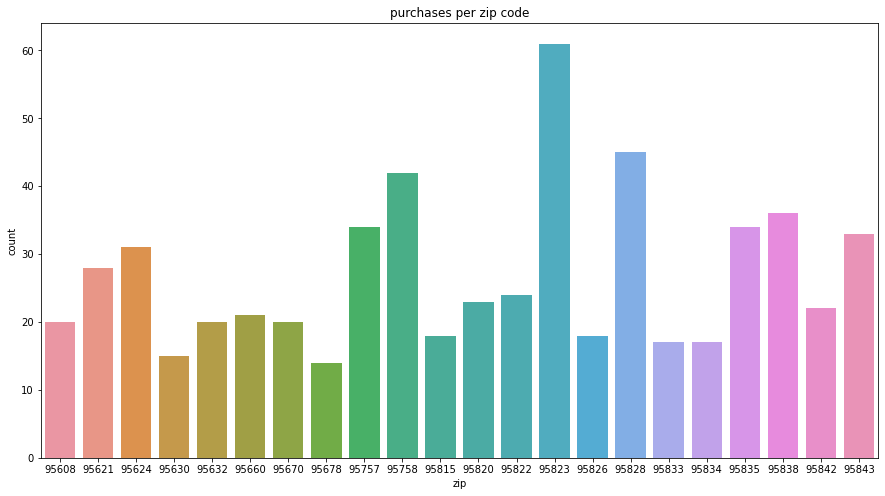

In [150]:
#purchases per zip code
count, ax6 = plt.subplots(figsize = (15,8))
ax6 = sns.countplot(x = "zip", data = cleanDataBox).set_title("purchases per zip code") 